Mean Squared Error: 384.53151509654714


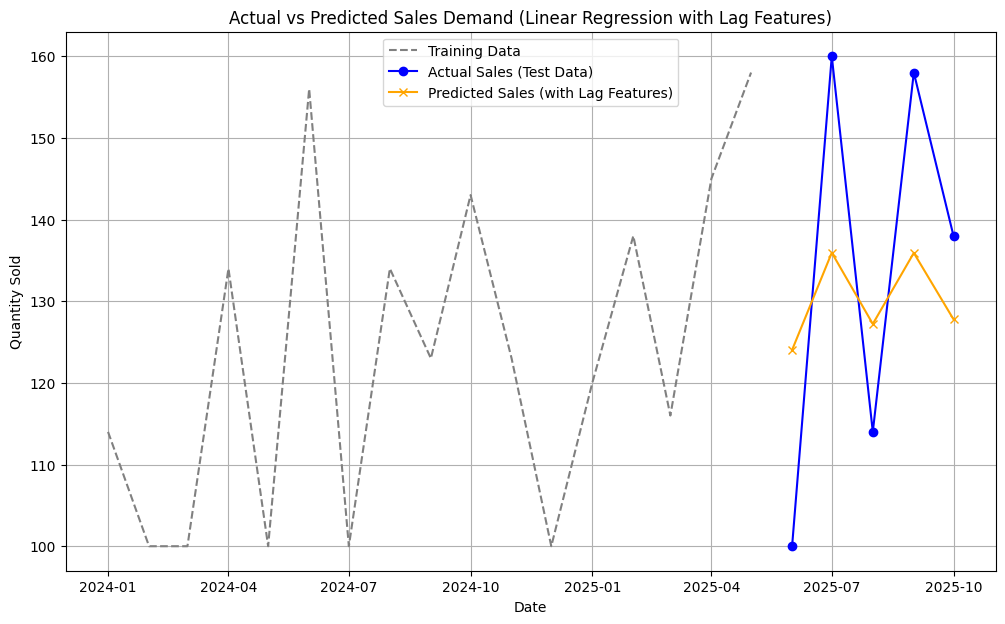

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Load and Clean Data (from previous responses)
data = pd.read_csv('Historical_Sales1.csv')
df = pd.DataFrame(data)  
df = df.replace(' ', np.nan)
df['QuantitySold'] = pd.to_numeric(df['QuantitySold'], errors='coerce')
df.dropna(inplace=True)
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(day=1))
df.set_index('Date', inplace=True)

# Step 2: Feature Engineering with Lag Features (CRITICAL CHANGE)

# 1. Create Lag 1 feature (Sales from the previous month)
df['Sales_Lag1'] = df['QuantitySold'].shift(1)

# 2. Create Lag 12 feature (Sales from the same month last year)
# This directly helps the model learn the yearly seasonal pattern amplitude
df['Sales_Lag3'] = df['QuantitySold'].shift(3)
df['Sales_Lag6'] = df['QuantitySold'].shift(6)
df['Sales_Lag9'] = df['QuantitySold'].shift(9)
df['Sales_Lag12'] = df['QuantitySold'].shift(12)

# Drop rows with NaN values created by shifting (the first 12 months won't have complete lag data)
df.dropna(inplace=True)

# Step 3: Train-test split (using a temporal split on the new, clean df)
train_size = int(len(df) * 0.8)
train_data = df[:train_size]
test_data = df[train_size:] 

# Target variable: QuantitySold
# Features now include the new 'Sales_Lag1' and 'Sales_Lag12'
X_train = train_data[["Sales_Lag1", "Sales_Lag3", "Sales_Lag6", "Sales_Lag9", "Sales_Lag12", "Year"]]
y_train = train_data["QuantitySold"]
X_test = test_data[["Sales_Lag1", "Sales_Lag3", "Sales_Lag6", "Sales_Lag9", "Sales_Lag12", "Year"]]
y_test = test_data["QuantitySold"]

# Step 4: Train the Linear regression model
model = LinearRegression()
model.fit(X_train, y_train) 

# Step 5: Forecast and Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Step 6: Visualization
plt.figure(figsize=(12, 7))
plt.plot(train_data.index, train_data['QuantitySold'], label='Training Data', color='gray', linestyle='--')
plt.plot(test_data.index, y_test, label='Actual Sales (Test Data)', marker='o', color='blue')
# The predicted line should now follow the actual sales much more closely
plt.plot(test_data.index, y_pred, label='Predicted Sales (with Lag Features)', marker='x', color='orange')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.title('Actual vs Predicted Sales Demand (Linear Regression with Lag Features)')
plt.legend()
plt.grid(True)
plt.show()
